In [1]:
# for interactive slicer
#%matplotlib widget
import tifffile
import os
import matplotlib.pyplot as plt
import tifffile
import numpy as np
import skimage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#import pumapy as puma
import pyvista as pv
import os
import pandas as pd
import math
from PIL import Image

D:\Software\Anaconda\envs\MachineLearning\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
def contrast_stretching(input_image):
    #Contrast stretching
    #Dropping extreems (artifacts)
    p2, p98 = np.percentile(input_image, (2, 98))
    stretched_image = skimage.exposure.rescale_intensity(input_image, in_range=(p2, p98))
    return stretched_image.astype('uint8')

In [3]:
def read_and_preprocessing (path, s):
    
    img = tifffile.imread(path)
    img = img[s[0]:s[1],s[2]:s[3],s[4]:s[5]]
    #img = contrast_stretching(img).astype('uint8')
    
    return img
    

In [4]:
snow_files = {'High-res': 'data/registered_image02_3dCT_B40_bag12_13_300mm.tif',
              'Bicubic' : 'data/02_Substack (6267-6662)_B40_bag12_13.tif',
              'SRCNN'   : 'model_output/02_Substack_predictions_SRCNN_.tif',
              'DCSRN'   : 'model_output/02_Substack_predictions_DCSRN_.tif',
              'SRUnet'  : 'model_output/02_Substack_predictions_SRUnet_.tif',
              'SRResnet': 'model_output/02_Substack_predictions_SRResnet_.tif'}

In [5]:
firn_files = {'High-res': 'data/registered_image06_3dCT_B40_bag56_57_100mm.tif',
              'Bicubic' : 'data/06_Substack (8055-8449)_B40_bag56_57.tif',
              'SRCNN'   : 'model_output/06_Substack_predictions_SRCNN_.tif',
              'DCSRN'   : 'model_output/06_Substack_predictions_DCSRN_.tif',
              'SRUnet'  : 'model_output/06_Substack_predictions_SRUnet_.tif',
              'SRResnet': 'model_output/06_Substack_predictions_SRResnet_.tif'}

In [6]:
ice_files = {'High-res': 'data/registered_image10_3dCT_B40_bag108_109_538mm.tif',
              'Bicubic' : 'data/10_Substack (4268-4663)_B40_bag108_109.tif',
              'SRCNN'   : 'model_output/10_Substack_predictions_SRCNN_.tif',
              'DCSRN'   : 'model_output/10_Substack_predictions_DCSRN_.tif',
              'SRUnet'  : 'model_output/10_Substack_predictions_SRUnet_.tif',
              'SRResnet': 'model_output/10_Substack_predictions_SRResnet_.tif'}

In [7]:
snow_slice = [10,410,800,1200,200,600]
firn_slice = [10,410,600,1000,1200,1600]
ice_slice= [10,410,200,600,800,1200]

snow
firn
ice


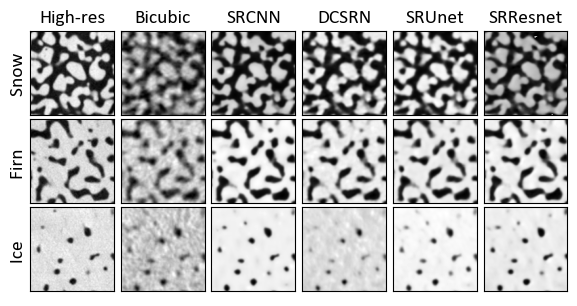

In [12]:
# Create a figure with subplots for displaying multiple images
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(7, 5),sharex=True, sharey=True)
i = 10

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for num , f in enumerate([snow_files,firn_files,ice_files]):
    type_ = ['snow','firn','ice'][num]
    print (type_)
    slice_ = [snow_slice,firn_slice,ice_slice][num]
    
    for row_number , name in enumerate(f.keys()):
        row_number = num*6 + row_number
        ax = axes[row_number]
        #print (name)
        #print (row_number)
        if row_number ==0 :
            i = 10
        elif row_number == 1:
            i = 9
        elif row_number >1:
            i = 10
        data = read_and_preprocessing (f[name], slice_)
        ax.imshow(data[i,:128,:128],'gray', extent=[0, 1, 0, 1])
        #ax.axis('off')  # Turn off axis labels
        ax.set_box_aspect(1)
        ax.yaxis.set_ticks([])
        ax.xaxis.set_ticks([])

        if type_ == 'snow':
            ax.set_title("{}".format(name), fontname='Calibri', fontsize=14)

fig.text(0.1, 0.38, '     Ice              Firn            Snow        ',
         va='center', rotation='vertical', fontfamily='Calibri', fontsize=14)
#plt.tight_layout()  # Adjust layout

fig.subplots_adjust(wspace=0.02, hspace=0.05, top=0.62, bottom=0.1)
plt.savefig('SR_resutls_2D.png',dpi=300)
plt.show()

    
    

snow
firn
ice


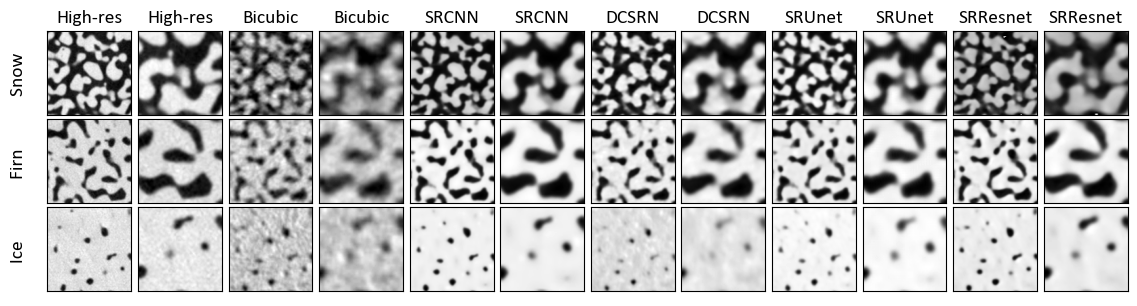

In [24]:
# Create a figure with subplots for displaying multiple images
fig, axes = plt.subplots(nrows=3, ncols=12, figsize=(14, 5),sharex=True, sharey=True)
i = 10

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for num , f in enumerate([snow_files,firn_files,ice_files]):
    type_ = ['snow','firn','ice'][num]
    print (type_)
    slice_ = [snow_slice,firn_slice,ice_slice][num]
    c = 0
    for row_number , name in enumerate(f.keys()):
        
        row_number = num*12 + row_number +c
        c+=1
        ax1 = axes[row_number]
        ax2 = axes[row_number+1]
        #print (name)
        #print (row_number)
        if row_number ==0 :
            i = 10
        elif row_number == 1:
            i = 9
        elif row_number >1:
            i = 10
        data = read_and_preprocessing (f[name], slice_)
        data = data[i,:128,:128]
        ax1.imshow(data,'gray', extent=[0, 1, 0, 1])
        ax1.set_box_aspect(1)
        ax1.yaxis.set_ticks([])
        ax1.xaxis.set_ticks([])
        
        data = data[-64:,-64:]
        img_pil = Image.fromarray(data)
        img_resized = img_pil.resize((128, 128))
        ax2.imshow(img_resized,'gray', extent=[0, 1, 0, 1])
        #ax.axis('off')  # Turn off axis labels
        ax2.set_box_aspect(1)
        ax2.yaxis.set_ticks([])
        ax2.xaxis.set_ticks([])

        if type_ == 'snow':
            ax1.set_title("{}".format(name), fontname='Calibri', fontsize=14)
            ax2.set_title("{}".format(name), fontname='Calibri', fontsize=14)

fig.text(0.1, 0.38, '     Ice              Firn            Snow        ',
         va='center', rotation='vertical', fontfamily='Calibri', fontsize=14)
#plt.tight_layout()  # Adjust layout

fig.subplots_adjust(wspace=0.02, hspace=0.05, top=0.62, bottom=0.1)
plt.savefig('SR_resutls_2D_another.png',dpi=300)
plt.show()

    

In [9]:

def contrast_stretching(input_image):
    #Contrast stretching
    #Dropping extreems (artifacts)
    p2, p98 = np.percentile(input_image, (2, 98))
    stretched_image = skimage.exposure.rescale_intensity(input_image, in_range=(p2, p98))
    return stretched_image.astype('uint8')

In [10]:
def read_and_preprocessing (path, s):
    
    img = tifffile.imread(path)
    img = img[s[0]:s[1],s[2]:s[3],s[4]:s[5]]
    img = contrast_stretching(img).astype('uint8')
    
    return img
    

In [11]:
def binary_seg_kMeans(img):
    binary = np.zeros_like(img)
    pixels = img.reshape(-1, 1)
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(pixels)
    centers = kmeans.cluster_centers_
    thresh = (centers[0] + centers[1])/2
    binary[img > thresh] = 1
    return binary

In [12]:
def puma_orientations (binary,file_name):
    ws = puma.Workspace.from_array(binary.copy())
    ws.voxel_length = 60e-6
    #print(f"Shape of workspace: {ors.matrix.shape}")
    puma.compute_orientation_st(ws, cutoff=(1,1), sigma=1.4, rho=0.7, edt=True)
    puma.export_vti('vti/Orientation_{}'.format(file_name),{'ws1':ws})
    return 

In [13]:
def puma_permeability (binary,file_name):
    print (binary.shape)
    ws = puma.Workspace.from_array(binary.copy())
    ws.voxel_length = 60e-6
    #print(f"Shape of workspace: {ws.matrix.shape}")
    #keff1, u_x1, p_x1, u_y1, p_y1, u_z1, p_z1
    keff, (u_x, u_y, u_z) = puma.compute_permeability(ws, solid_cutoff=(1, 1),solver_type='minres',
                                                      direction='xyz', tol=1e-07,
                                                      maxiter=10000,display_iter=True,
                                                      matrix_free=False, precondition=False,
                                                      output_fields=True)
    puma.export_vti('vti/permeability_{}'.format(file_name),{'ws':ws ,'u_x':u_x, 'u_y':u_y, 'u_z':u_z})
    print ('permeability done')
    return keff #Effective permeability tensor

In [14]:
def puma_tortuosity (binary,file_name):
    print ('Tortousity started !') 
    outputs = []
    
    #binary = downscale_local_mean(binary, (8,8,8))
    binary[binary>0.5] = 1
    binary[binary<=0.5] = 0
    ws = puma.Workspace.from_array(binary)
    ws.voxel_length = 60e-6
    #print(f"Shape of workspace: {ws.matrix.shape}")
    st = 'cg' #'bicgstab'#'direct' #
    mf = False
    n_eff_x, Deff_x, poro, C_x = puma.compute_continuum_tortuosity(ws, (0,0), 'x', side_bc='s', tolerance=1e-4, solver_type=st, matrix_free = mf)
    n_eff_y, Deff_y, poro, C_y = puma.compute_continuum_tortuosity(ws, (0,0), 'y', side_bc='s', tolerance=1e-4, solver_type=st, matrix_free = mf)
    n_eff_z, Deff_z, poro, C_z = puma.compute_continuum_tortuosity(ws, (0,0), 'z', side_bc='s', tolerance=1e-4, solver_type=st, matrix_free = mf)
    outputs.append(['inside Air',str((round(n_eff_x[0],1), round(n_eff_y[1],1) , round(n_eff_z[2],1)))])
    puma.export_vti('vti/Tortousity_air_{}'.format(file_name),{'ws':ws ,'C_x':C_x, 'C_y':C_y, 'C_z':C_z})
    
    n_eff_x, Deff_x, poro, C_x = puma.compute_continuum_tortuosity(ws, (1,1), 'x', side_bc='s', tolerance=1e-4, solver_type=st, matrix_free = mf)
    n_eff_y, Deff_y, poro, C_y = puma.compute_continuum_tortuosity(ws, (1,1), 'y', side_bc='s', tolerance=1e-4, solver_type=st, matrix_free = mf)
    n_eff_z, Deff_z, poro, C_z = puma.compute_continuum_tortuosity(ws, (1,1), 'z', side_bc='s', tolerance=1e-4, solver_type=st, matrix_free = mf)
    outputs.append(['inside Ice',str((round(n_eff_x[0],1), round(n_eff_y[1],1) , round(n_eff_z[2],1)))])    
    puma.export_vti('vti/Tortousity_ice_{}'.format(file_name),{'ws':ws ,'C_x':C_x, 'C_y':C_y, 'C_z':C_z})

    
    print ('Tortousity done')
   # poro is the porosity of the material
   # n_eff is the effective tortuosity factor
   # C_x is the computed field vector
    return str(outputs)

In [15]:
snow_slice = [10,138,800,928,200,328]
firn_slice = [10,138,600,728,1200,1328]
ice_slice= [10,138,200,328,800,928]

In [16]:
for num , f in enumerate([snow_files,firn_files,ice_files]):
    type_ = ['snow','firn','ice'][num]
    print (type_)
    slice_ = [snow_slice,firn_slice,ice_slice][num]
    for row_number , name in enumerate(f.keys()):
        row_number = num*6 + row_number
        print (name)
        print (row_number)
        data = read_and_preprocessing (f[name], slice_)
        data = binary_seg_kMeans (data)
        #puma_orientations(data,type_)
        #keff = puma_permeability(data,type_)
        tau = puma_tortuosity(data,type_)
        break

        

snow
High-res
0
Tortousity started !
Approximate memory requirement for simulation: 478.0 MB
Creating conductivity matrix ... Done
Initializing temperature field ... Done
Setting up b matrix ... Done
Done
Setting up preconditioner ...Done
Time to assemble matrices:  0.7036436000000208
Solving Ax=b using cg solver
Iteration: 175, driving modified residual = 0.0126430290 --> target = 0.0128000000 ... Done
Time to solve:  7.036730200000022
Computing flux from converged temperature field ... Done
Volume Fraction for cutoff (0, 0): 0.47178220748901367
Approximate memory requirement for simulation: 478.0 MB
Creating conductivity matrix ... Done
Initializing temperature field ... Done
Setting up b matrix ... Done
Done
Setting up preconditioner ...Done
Time to assemble matrices:  0.707053099999996
Solving Ax=b using cg solver
Iteration: 171, driving modified residual = 0.0127640302 --> target = 0.0128000000 ... Done
Time to solve:  6.974671300000011
Computing flux from converged temperature fi

In [ ]:
keff